In [1]:
%matplotlib notebook

In [2]:
import nltk

In [3]:
# in the Unicode character set, the following sentence corresponds
# to the following list of integers (let's assume the computer uses
# decimal digits to represent these numbers to make the discussion
# easier to understand, even though in reality it uses binary bits;
# but conceptually, there's no relevant difference)
list(ord(c) for c in "It's sunny, we should be at the swimming pool instead of in class...")

[73,
 116,
 39,
 115,
 32,
 115,
 117,
 110,
 110,
 121,
 44,
 32,
 119,
 101,
 32,
 115,
 104,
 111,
 117,
 108,
 100,
 32,
 98,
 101,
 32,
 97,
 116,
 32,
 116,
 104,
 101,
 32,
 115,
 119,
 105,
 109,
 109,
 105,
 110,
 103,
 32,
 112,
 111,
 111,
 108,
 32,
 105,
 110,
 115,
 116,
 101,
 97,
 100,
 32,
 111,
 102,
 32,
 105,
 110,
 32,
 99,
 108,
 97,
 115,
 115,
 46,
 46,
 46]

In [4]:
# when the computer stores this sequence of integers, it can't just
# put them end to end, because it would have no idea where the
# individual characters begin and end -- for instance here: is the
# first character 7, 73, 731...?
"".join(str(ord(c)) for c in "It's sunny, we should be at the swimming pool instead of in class...")

'7311639115321151171101101214432119101321151041111171081003298101329711632116104101321151191051091091051101033211211111110832105110115116101971003211110232105110329910897115115464646'

In [5]:
# it's the job of the encoding to define how these integers will be
# stored in order for those boundaries to become clear -- for instance,
# a fixed-width encoding will use the same number of digits for each
# codepoint, e.g. 4:
"".join(str(ord(c)).rjust(4, "0") for c in "It's sunny, we should be at the swimming pool instead of in class...")

'00730116003901150032011501170110011001210044003201190101003201150104011101170108010000320098010100320097011600320116010401010032011501190105010901090105011001030032011201110111010800320105011001150116010100970100003201110102003201050110003200990108009701150115004600460046'

Now, it's easy to split the stream of digits at every fourth one and see that the first character is `0073`, the second one is `0116` etc.

# Getting your own data into Python I

In [6]:
# open a filehandle (NOTE: replace the path with one appropriate for your setup,
# e.g. "C://Users/<your_username>/..." on Windows)
fh = open("/Users/dvl/nltk_data/corpora/gutenberg/carroll-alice.txt")

In [7]:
# "\n" is an "escape sequence" which indicates a newline inside a Python string
fh.readline()

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n"

In [8]:
fh.readline()

'\n'

In [9]:
fh.read()[:50]

'CHAPTER I. Down the Rabbit-Hole\n\nAlice was beginni'

In [10]:
# close the filehandle when you're done with it
fh.close()

In [11]:
# a "with" statement takes care of handling the closing for you even if
# errors occur at some point during processing; use it :)
with open("/Users/dvl/nltk_data/corpora/gutenberg/carroll-alice.txt") as fh:
    alice = fh.read()

In [12]:
alice[:50]

"[Alice's Adventures in Wonderland by Lewis Carroll"

In [13]:
# when reading the file line by line, a "for ... in" loop is typically
# used
with open("/Users/dvl/nltk_data/corpora/gutenberg/carroll-alice.txt") as fh:
    line_length_sum = 0
    number_of_lines = 0
    for line in fh:
        # if a string ends with a newline, .strip() removes it
        line = line.strip()
        line_length_sum += len(line)
        number_of_lines += 1
        
line_length_sum / number_of_lines

42.06724707295107

In [14]:
with open("/Users/dvl/nltk_data/corpora/gutenberg/carroll-alice.txt") as fh:
    total = sum(1 for line in fh)  # (non-)empty lines also!
total

3331

In [15]:
with open("/Users/dvl/nltk_data/corpora/gutenberg/carroll-alice.txt") as fh:
    empty_lines = sum(1 for line in fh if line.strip() == "")
empty_lines

852

In [16]:
with open("/Users/dvl/nltk_data/corpora/gutenberg/carroll-alice.txt") as fh:
    non_empty_lines = sum(1 for line in fh if line.strip() != "")
non_empty_lines

2479

In [17]:
# this a Jupyter-specific way to open a convenient popup with the text content
# of a string; it's NOT Python syntax!
%page -r alice

In [18]:
# requests is a library which allows you to fetch web pages much like your browser
# does
import requests

# the .get() method retrieves the content at a given URL
response = requests.get("http://www.gutenberg.org/cache/epub/1112/pg1112.txt")
response

<Response [200]>

In [19]:
# .text stores the content of the response as a string; it's not a method, just
# a data attribute -- a string (in this case) which is tacked onto the response
# object. since it's not a method, trying to invoke it (by appending parentheses)
# fails
rnj = response.text()

TypeError: 'str' object is not callable

In [20]:
# the correct way to access it is just to type its name. it works like any other
# variable really, with the caveat that its name ("text") must be prefixed by
# the namespace of its parent object ("response").
rnj = response.text

In [21]:
%page -r rnj

In [22]:
rnj.index("THE TRAGEDY"), rnj.index("THE END")

(1807, 159841)

In [23]:
rnj = rnj[1807:159848]

In [24]:
%page -r rnj

In [25]:
rnj_tokens = nltk.word_tokenize(rnj)
rnj_tokens[:10]

['THE',
 'TRAGEDY',
 'OF',
 'ROMEO',
 'AND',
 'JULIET',
 'by',
 'William',
 'Shakespeare',
 'Dramatis']

In [26]:
rnj_text = nltk.Text(rnj_tokens)

<IPython.core.display.Javascript object>


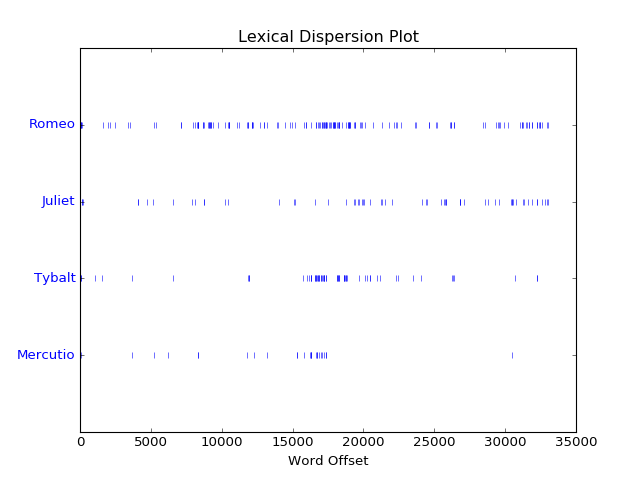

In [27]:
rnj_text.dispersion_plot(["Romeo", "Juliet", "Tybalt", "Mercutio"])

Most of the web doesn't contain just raw text though, but also HTML markup used to format the text. In addition to actual content, many web pages include pieces of text which are not really interesting because they're not full sentences and they're typically the same for all the pages on a website -- for instance, navigation elements. Collectively, these are called **boilerplate**.

Python has a really good library for boilerplate removal, which is called `bs4` (Beautiful Soup).

In [28]:
# fetch a webpage
response = requests.get("http://www.theguardian.com/politics/2016/aug/23/nicola-sturgeon-to-appoint-brexit-minister")
# extract its text content from the response
brex = response.text
# whoops -- we need to get rid of this HTML markup and other boilerplate!
brex[:50]

'\n<!DOCTYPE html>\n<html id="js-context" class="js-o'

In [29]:
from bs4 import BeautifulSoup

brex = BeautifulSoup(brex, "lxml").get_text()
# whew, that's better (though admittedly not ideal)!
brex[:50]

'\n\n\n\nNicola Sturgeon to appoint Brexit minister | P'

In [30]:
brex_text = nltk.Text(nltk.word_tokenize(brex))

In [31]:
brex_text.concordance("Brexit")

Displaying 25 of 28 matches:
                                    Brexit minister | Politics | The Guardian 
 '' : '' Nicola Sturgeon to appoint Brexit minister '' , '' isImmersive '' : f
 '' : '' Nicola Sturgeon to appoint Brexit minister '' , '' isFront '' : false
 '' : '' Nicola Sturgeon to appoint Brexit minister '' , '' shouldHideAdverts 
' : '' Nicola Sturgeon said her new Brexit minister would further embed Scotti
 Scottish interests during the UK’s Brexit talks . `` , '' credit '' : '' Phot
Nicola Sturgeon , EU referendum and Brexit , Scottish independence , European 
Sturgeon Nicola Sturgeon to appoint Brexit minister First minister appears to 
 talks Nicola Sturgeon said her new Brexit minister would further embed Scotti
 Scottish interests during the UK’s Brexit talks . Photograph : Jeff Mitchell/
ger Nicola Sturgeon is to appoint a Brexit minister to influence the terms of 
vernment paper which forecasts that Brexit could cost Scotland’s economy as mu
ng a Treasury paper on 

If you want to download a lot of web content, not necessarily specific pages, just a lot of pages based on a few links you provide as seeds to start the search, use a **web crawler / spider**. A good web crawler for Python and linguistics is **SpiderLing**: <http://corpus.tools/wiki/SpiderLing>.

# Regular expressions

Regular expressions are a query language which makes it possible to match different strings with a single query (instead of searching for all of them literally one by one). It also allows you to define sophisticated replacement operations.

In [32]:
# simple matching and replacement for literal character sequences can be done
# without regular expressions -- let's define a string to play with:
string = """the cat and the dog
went down to the bog
they drank some whiskey and ate
the hog"""

In [33]:
# notice that the triple quote syntax allows you to have multiline strings!
# it also makes it easy to put quotes inside a quoted string -- if a simple
# string is to contain a quotation mark, it needs to be escaped...
"My father's nickname is \"Big D\" but his real name is Donald."

'My father\'s nickname is "Big D" but his real name is Donald.'

In [34]:
# if you use single quotes for defining your strings, then double quotes are
# fine, but you need to escape single quotes...
'My father\'s nickname is "Big D" but his real name is Donald.'

'My father\'s nickname is "Big D" but his real name is Donald.'

In [35]:
# ... otherwise, bad stuff happens, because Python ends the string prematurely
# when parsing it
'My father's nickname is "Big D" but his real name is Donald."

SyntaxError: invalid syntax (<ipython-input-35-8cd7030836cc>, line 3)

In [36]:
"My father's nickname is "Big D" but his real name is Donald."

SyntaxError: invalid syntax (<ipython-input-36-950f482449a5>, line 1)

In [37]:
# triple quotes free you from having to think about this; additionally, they
# allow you to type literal newlines into the string
"""My father's nickname is "Big D"
but his real name is Donald."""

'My father\'s nickname is "Big D"\nbut his real name is Donald.'

In [38]:
# anyway, back to our example string: .find() returns the index (>= 0) of the
# argument substring on success...
string.find("cat")

4

In [39]:
# ... or -1 on failure
string.find("hippopotamus")

-1

In [40]:
# .replace() creates a new string where all occurrences of the first argument
# are replaced by the second one
print(string.replace("the", "hippopotamus"))

hippopotamus cat and hippopotamus dog
went down to hippopotamus bog
hippopotamusy drank some whiskey and ate
hippopotamus hog


But what if you want to match both "cat" and "dog", or replace them by their plurals -- at the same time? That's what regular expressions are for.

Python has a built-in regular expression module called simply `re`, but it's worth **downloading and using the external `regex` library**, because it has more features, **better Unicode support** and it's faster.

Summary of regex syntax based on the [NLTK Book](http://www.nltk.org/book/ch03.html):

```python
.         # Wildcard, matches any character
\w   \W   # Matches any (non-)word character (careful, the
          # computer's idea about what a word character is might
          # be different from yours)
\d   \D   # Matches any (non-)digit character
\s   \S   # Matches any (non-)space character
\p{...}   # Matches any character with Unicode property ...
\P{...}   # Matches any character without Unicode property ...
^abc      # Matches some pattern abc at the start of a string
          # (or line, if the multiline flag is enabled)
abc$      # Matches some pattern abc at the end of a string
          # (or line, if the multiline flag is enabled)
\babc\b   # Matches some pattern abc surrounded by word boundaries
\Babc\B   # Matches some pattern abc not surrounded by word boundaries
[abc]     # Matches one of a set of characters
[A-Z0-9]  # Matches one of a range of characters
ed|ing|s  # Matches one of the specified strings (disjunction)
*         # Zero or more of previous item, e.g. a*, [a-z]* (also
          # known as Kleene Closure); greedy (match as many as
          # possible)
*?        # The same as *, but non-greedy (match as few as possible)
+         # One or more of previous item, e.g. a+, [a-z]+; greedy
+?        # The same as + but non-greedy
?         # Zero or one of the previous item (i.e. optional), e.g.
          # a?, [a-z]?
{n}       # Exactly n repeats where n is a non-negative integer
{n,}      # At least n repeats
{,n}      # No more than n repeats
{m,n}     # At least m and no more than n repeats
a(b|c)+   # Parentheses indicate the scope of the operators and
          # capture the corresponding groups of characters, which
          # are then accessible accessible with the match.group()
          # match.groups() method
a(?:b|c)+ # Non-capturing version of the parentheses
```

An overview of Unicode properties available for matching characters can be found here: <http://www.regular-expressions.info/unicode.html>. If you want to inspect the properties of a particular character, the following web page might be useful: <http://unicode.org/cldr/utility/properties.html>.

In [41]:
# this imports the `regex` library and renames it to `re` for convenience
# (it's less typing)
import regex as re

In [42]:
# re.match(pattern, string) returns a successful match when the string
# matches the the pattern starting at the beginning of the string
re.match("the", string)

<regex.Match object; span=(0, 3), match='the'>

In [43]:
re.match("cat", string)

In [44]:
# re.search(pattern, string) allows the pattern to match at any point
# in the string (returning the first match)
re.search("cat", string)

<regex.Match object; span=(4, 7), match='cat'>

**TIP!** The backslash `\` is an **escape character** -- it changes the meaning of the following (sequence of) character(s). Some **escape sequences** are also available in vanilla Python strings, e.g. `\n` for newline, `\t` for tabulator, `\r` for carriage return. With regular expressions, in order to avoid any surprises, you should prevent Python from interpreting these escape sequences, so that the regular expression library sees them as you've typed them. Therefore, for defining regular expressions matching and replacement patterns, **use raw strings** (which cancel the interpretation of backslash escapes by Python): type `r"..."` instead of just `"..."`. That's what we'll do from now on.

In [45]:
# re.finditer(pattern, string) is kind of like re.search(), but it
# doesn't stop at the first match -- it'll keep searching until the
# end of the string, returning all matches. careful, it's a
# *generator*, i.e. it's lazy and won't evaluate until you force it,
# e.g. by requesting a list of the results
list(re.finditer(r"[dbh]og", string))

[<regex.Match object; span=(16, 19), match='dog'>,
 <regex.Match object; span=(37, 40), match='bog'>,
 <regex.Match object; span=(77, 80), match='hog'>]

In [46]:
# re.findall(pattern, string) is kind of like re.finditer(), but it's
# not lazy and instead of Match objects, returns plain strings
# corresponding to the matches...
re.findall(r"[dbh]og", string)

['dog', 'bog', 'hog']

In [47]:
# ... unless your pattern contains capturing groups (indicated by
# parentheses), in which case it returns whatever substring was
# captured by those groups:
re.findall(r"(the|some) (cat|[dbh]og|whiskey)", string)

[('the', 'cat'),
 ('the', 'dog'),
 ('the', 'bog'),
 ('some', 'whiskey'),
 ('the', 'hog')]

In [48]:
# conversely, re.finditer() still returns a list of Match objects
matches = list(re.finditer(r"(the|some) (cat|[dbh]og|whiskey)", string))
matches

[<regex.Match object; span=(0, 7), match='the cat'>,
 <regex.Match object; span=(12, 19), match='the dog'>,
 <regex.Match object; span=(33, 40), match='the bog'>,
 <regex.Match object; span=(52, 64), match='some whiskey'>,
 <regex.Match object; span=(73, 80), match='the hog'>]

In [49]:
# the Match object returned by re.match(), re.search() and re.finditer()
# gives you richer information and allows for more fine-grained control
# than the context-dependent result of re.findall(). let's take a look
# at the first match from our previous example:
match = matches[0]

In [50]:
# the substring corresponding to the match can be extracted from the
# Match object with the .group() method without any argument
match.group()

'the cat'

In [51]:
# whereas the content of the capturing groups can be extracted using the
# .group() method with numeric arguments (groups are numbered sequentially
# as they are defined in the pattern), or at once with the .groups() method
match.groups()

('the', 'cat')

In [52]:
# additionally, you also get the span of the match in the original string
# (and more)
match.span()

(0, 7)

In [53]:
string[0:7]

'the cat'

In [54]:
# re.sub(pattern, replacement_pattern, string) replaces all occurrences
# of pattern in string with replacement_pattern
print(re.sub(r"\bthe\b", r"a", string))

a cat and a dog
went down to a bog
they drank some whiskey and ate
a hog


In [55]:
# the count argument to re.sub() can be used to limit the number of
# replacements to be made
print(re.sub(r"\bthe\b", r"a", string, count=2))

a cat and a dog
went down to the bog
they drank some whiskey and ate
the hog


In [56]:
# numbered back-references can be used to refer back to the content
# of captured groups inside the replacement string (in this case, it's
# *really* important to use a raw string as the replacement pattern)
print(re.sub(r"(the|some) (cat|[dbh]og|whiskey)", r"\1 cute \2s", string))

the cute cats and the cute dogs
went down to the cute bogs
they drank some cute whiskeys and ate
the cute hogs


In [57]:
# FINALLY (whew!), all of these functions have a flags argument to modify
# the behavior of the regular expression pattern matching engine; re.DOTALL
# makes the . match all characters including the newline
re.search(r"dog.*bog", string)

In [58]:
re.search(r"dog.*bog", string, flags=re.DOTALL)

<regex.Match object; span=(16, 40), match='dog\nwent down to the bog'>

In [59]:
# re.IGNORECASE makes the matching case insensitive (that's probably
# intuitive enough), and re.MULTILINE makes ^ and $ match the beginnings
# and ends of *lines* within the string, instead of only the beginning
# and end of the string
print(re.sub(r"^the", r"THE", string))

THE cat and the dog
went down to the bog
they drank some whiskey and ate
the hog


In [60]:
print(re.sub(r"^the", r"THE", string, flags=re.MULTILINE))

THE cat and the dog
went down to the bog
THEy drank some whiskey and ate
THE hog


In [61]:
# flags can be combined using the | ("bitwise or") operator. it's a
# stupid design decision, providing separate arguments to allow the 
# functions to be invoked like re.search(..., multiline=True, ignorecase=True)
# would have been better, but that's life :) leaving aside the details
# of how this works, this is how you perform e.g. a multiline match
# where dot matches all:
re.search("dog$.*bog$", string, flags=re.MULTILINE | re.DOTALL)

<regex.Match object; span=(16, 40), match='dog\nwent down to the bog'>

**TIP!** One last important Unicode caveat: `.` actually matches individual codepoints, and as we've seen, what appears on the screen as **one grapheme** can actually consist of **multiple codepoints**. In order to **match graphemes**, use the **`\X` escape sequence**. This is useful when you want to get an exact measure of the length of a string in graphemes, not just the number of codepoints.

In [62]:
re.findall(r".", "æ̤̃̽")

['æ', '̃', '̤', '̽']

In [63]:
re.findall(r"\X", "æ̤̃̽")

['æ̤̃̽']

In [64]:
len("æ̤̃̽")

4

In [65]:
len(re.findall(r"\X", "æ̤̃̽"))

1

Now, evaluate the next cell and play around with regular expression matching using the interactive widget! (You are not expected to understand how this code works at this point; if you're curious, look up HTML markup and Python decorators.)

In [66]:
import IPython.core.display as ipd
import ipywidgets as ipw

@ipw.interact(regex=ipw.Text(), string=ipw.Textarea())
def findall(DOTALL=False, MULTILINE=False, IGNORECASE=False, only_first=False, regex="", string=""):
    if not (regex and string):
        ipd.display(ipd.HTML(""))
        return None
    flags = 0
    if DOTALL:
        flags |= re.DOTALL
    if MULTILINE:
        flags |= re.MULTILINE
    if IGNORECASE:
        flags |= re.IGNORECASE
    start = '<span style="background-color: gold">'
    end = "</span>"
    offset_bump = len(start) + len(end)
    offset = 0
    html = string
    matches = []
    for m in re.finditer(regex, string, flags):
        matches.append(m.captures()[0])
        span = m.span()
        sstart, send = span[0] + offset, span[1] + offset
        html = html[:sstart] + start + html[sstart:send] + end + html[send:]
        offset += offset_bump
        if only_first:
            break
    ipd.display(ipd.HTML("<p>regex: <strong>" + regex + "</strong></p>" + "<pre>" + html + "</pre"))
    return matches

**TIP!** If you want to match everything we might informally think of as "letters", it is best to use the `\p{Alphabetic}` Unicode property rather than `\p{Letter}` (`\w` is best avoided, "word characters" is a handwavy category), because it turns out that not all alphabetic characters are letters:

In [67]:
import unicodedata as ud

# this call to the range() function generates successive integers from 0
# to 1114111; 0x10ffff is just the hexadecimal representation of 1114111,
# and it's the highest integer that Python is able to convert to a character
# in the Unicode character set, which I found out by looking at the
# documentation of the chr function by running chr?
for i in range(0x10ffff):
    # for each of these integers, give me the corresponding character
    c = chr(i)
    # if the character is alphabetic (= it successfully matches \p{Alphabetic})
    # but at the same time, it's not a letter (= it fails to match \p{Letter}),
    # then print it, along with its name (if it has no name, print "!no name!"
    # instead)
    if re.match(r"\p{Alphabetic}", c) and re.match(r"\P{Letter}", c):
        print("{} / {}".format(c, ud.name(c, "!no name!")))

ͅ / COMBINING GREEK YPOGEGRAMMENI
ְ / HEBREW POINT SHEVA
ֱ / HEBREW POINT HATAF SEGOL
ֲ / HEBREW POINT HATAF PATAH
ֳ / HEBREW POINT HATAF QAMATS
ִ / HEBREW POINT HIRIQ
ֵ / HEBREW POINT TSERE
ֶ / HEBREW POINT SEGOL
ַ / HEBREW POINT PATAH
ָ / HEBREW POINT QAMATS
ֹ / HEBREW POINT HOLAM
ֺ / HEBREW POINT HOLAM HASER FOR VAV
ֻ / HEBREW POINT QUBUTS
ּ / HEBREW POINT DAGESH OR MAPIQ
ֽ / HEBREW POINT METEG
ֿ / HEBREW POINT RAFE
ׁ / HEBREW POINT SHIN DOT
ׂ / HEBREW POINT SIN DOT
ׄ / HEBREW MARK UPPER DOT
ׅ / HEBREW MARK LOWER DOT
ׇ / HEBREW POINT QAMATS QATAN
ؐ / ARABIC SIGN SALLALLAHOU ALAYHE WASSALLAM
ؑ / ARABIC SIGN ALAYHE ASSALLAM
ؒ / ARABIC SIGN RAHMATULLAH ALAYHE
ؓ / ARABIC SIGN RADI ALLAHOU ANHU
ؔ / ARABIC SIGN TAKHALLUS
ؕ / ARABIC SMALL HIGH TAH
ؖ / ARABIC SMALL HIGH LIGATURE ALEF WITH LAM WITH YEH
ؗ / ARABIC SMALL HIGH ZAIN
ؘ / ARABIC SMALL FATHA
ؙ / ARABIC SMALL DAMMA
ؚ / ARABIC SMALL KASRA
ً / ARABIC FATHATAN
ٌ / ARABIC DAMMATAN
ٍ / ARABIC KASRATAN
َ / ARABIC FATHA
ُ / ARABIC DAMMA
ِ 

# Getting your own data into Python II

In [68]:
# we've seen that nltk.Text() creates a Text object, and that NLTK provides
# access to some corpora -- e.g. from nltk.corpus import brown. if you have
# a collection of text files, you can also easily create your own corpus
# objects! a PlaintextCorpusReader is initialized with a string containing
# the path to the directory where your files are stored, and either a list
# of filenames to include in the corpus, or a regular expression pattern against
# which filenames will be matched and files included in case of a successful
# match
small_gutenberg = nltk.corpus.PlaintextCorpusReader("/Users/dvl/nltk_data/corpora/gutenberg/",
                                                    ["melville-moby_dick.txt", "carroll-alice.txt"])

In [69]:
small_gutenberg.fileids()

['melville-moby_dick.txt', 'carroll-alice.txt']

In [70]:
my_gutenberg = nltk.corpus.PlaintextCorpusReader("/Users/dvl/nltk_data/corpora/gutenberg/", r".*\.txt")

In [71]:
my_gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [72]:
my_gutenberg.words("whitman-leaves.txt")

['[', 'Leaves', 'of', 'Grass', 'by', 'Walt', 'Whitman', ...]

In [73]:
# you can also create categorized corpora, like brown. there are various
# ways to tell NLTK how the texts should be categorized, see
# nltk.corpus.CategorizedCorpusReader? for an overview. one way is to
# specify a cat_pattern argument, which is a regular expression with
# a capturing group; this will be matched against the file names of the
# files in the corpus, and the content of the group will be extracted
# as the category for the given file:
gutenberg_by_author = nltk.corpus.CategorizedPlaintextCorpusReader(
    "/Users/dvl/nltk_data/corpora/gutenberg/", r".*\.txt", cat_pattern=r"(.*?)-")

In [74]:
gutenberg_by_author.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [75]:
gutenberg_by_author.categories()

['austen',
 'bible',
 'blake',
 'bryant',
 'burgess',
 'carroll',
 'chesterton',
 'edgeworth',
 'melville',
 'milton',
 'shakespeare',
 'whitman']

In [76]:
gutenberg_by_author.categories("shakespeare-hamlet.txt")

['shakespeare']

In [77]:
gutenberg_by_author.words(categories="shakespeare")

['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', ...]